In [1]:
import numpy
import matplotlib.pyplot as plt
from general_functions import *
%matplotlib inline

In [2]:
zmin = 0.
zmax = 0.45

v_win = 300. #+/-km/s #Velocity window for stack

beams = [3.,0.5,20./60.,10./60.] #arcmin

#Make the redshift bins
z_list = numpy.arange((zmax-zmin)/1000.,zmax+(zmax-zmin)/1000.,(zmax-zmin)/1000.)

#Convert to comoving distances and beam physical sizes
D_list = numpy.zeros(len(z_list))
a_list = numpy.zeros((len(beams),len(z_list)))
for i in range(len(z_list)):
    for j in range(len(beams)):
        a_list[j][i] = phys_size((beams[j]/60.)*(numpy.pi/180.),z_list[i])
    D_list[i] = co_dist(z_list[i])

#Nominal volume defined by beam and stack window
v_nom = numpy.pi*((a_list/2.)**2.)*(2.*v_win/H0)

#Now calculate the effective volume including 2PCF
v_eff = numpy.zeros((len(beams),len(z_list)))
for i in range(len(z_list)):
    for j in range(len(beams)):
        v_eff[j][i] = m_av_mod(v_win/H0,a_list[j][i]/2.)

#Assume no redshift evolution in Omega_HI
z_evo = E(z_list)**2.

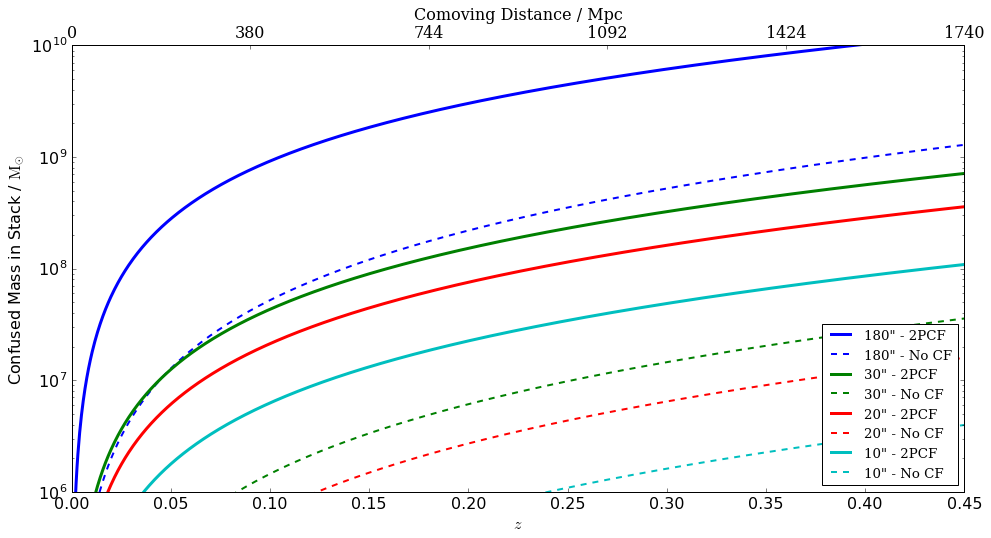

In [3]:
fig,ax = plt.subplots(figsize=(16,8))

font = {'size' : 16, 'family' : 'serif'}
plt.rc('font', **font)

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

for j in range(len(beams)):
    ax.plot(z_list,z_evo*v_eff[j]*rho_HI_0,lw=3,
            label=str(int(numpy.round(beams[j]*60.,0)))+'" - 2PCF',
            c=colours[j])
    ax.plot(z_list,z_evo*v_nom[j]*rho_HI_0,lw=2,
            label=str(int(numpy.round(beams[j]*60.,0)))+'" - No CF',
            c=colours[j],ls='--')
    
ax.set_yscale('log')
ax.set_ylim(1.E6,1.E10)
ax.set_xlim(zmin,zmax)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r"Confused Mass in Stack / $\mathrm{M_{\odot}}$")

ax2 = ax.twiny()
tic_vals = numpy.linspace(zmin,zmax,6)

for i in range(len(tic_vals)):
    tic_vals[i] = round(co_dist(tic_vals[i]))
    
ax2.set_xticklabels(numpy.array(tic_vals,dtype='int'))
ax2.set_xlabel("Comoving Distance / Mpc")

ax.legend(loc=4,fontsize='small')